In [1]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("pl_core_news_sm")

In [3]:
# Chargement des données
df = pd.read_csv('statistiques_erreurs_par_apprenant.csv')

In [4]:
# Liste pour les erreurs de déclinaison (toutes, même si les cas sont les mêmes)
erreurs_declinaison = []

# Traitement
for idx, row in df.iterrows():
    texte_errone = str(row['Forme erronée (manuel)'])
    texte_correct = str(row['Forme correcte'])
    
    doc_errone = nlp(texte_errone)
    doc_correct = nlp(texte_correct)

    pays_data = {pays: row[pays] for pays in ['FR', 'IT', 'NL', 'UK', 'GE']}
    
    for token_errone, token_correct in zip(doc_errone, doc_correct):
        if token_correct.pos_ in ['NOUN', 'ADJ']:
            cas_errone = token_errone.morph.get('Case')
            cas_correct = token_correct.morph.get('Case')
            
            erreur = {
                'forme incorrecte': token_errone.text,
                'cas': cas_errone[0] if cas_errone else None,
                'forme correcte': token_correct.text,
                'cas correct': cas_correct[0] if cas_correct else None,
                'correspondance': 'différent' if cas_errone != cas_correct else 'identique'
            }
            erreur.update(pays_data)
            erreurs_declinaison.append(erreur)

# Création du DataFrame
erreurs_df = pd.DataFrame(erreurs_declinaison)

# Réorganisation des colonnes
colonnes = ['forme incorrecte', 'cas', 'forme correcte', 'cas correct', 'correspondance', 'FR', 'IT', 'NL', 'UK', 'GE']
erreurs_df = erreurs_df[colonnes]

In [5]:
# Sauvegarde
erreurs_df.to_csv('erreurs_déclinaison_spacy.csv', index=False)

print("Fichier 'erreurs_déclinaison_spacy.csv' généré.")

Fichier 'erreurs_déclinaison_spacy.csv' généré.


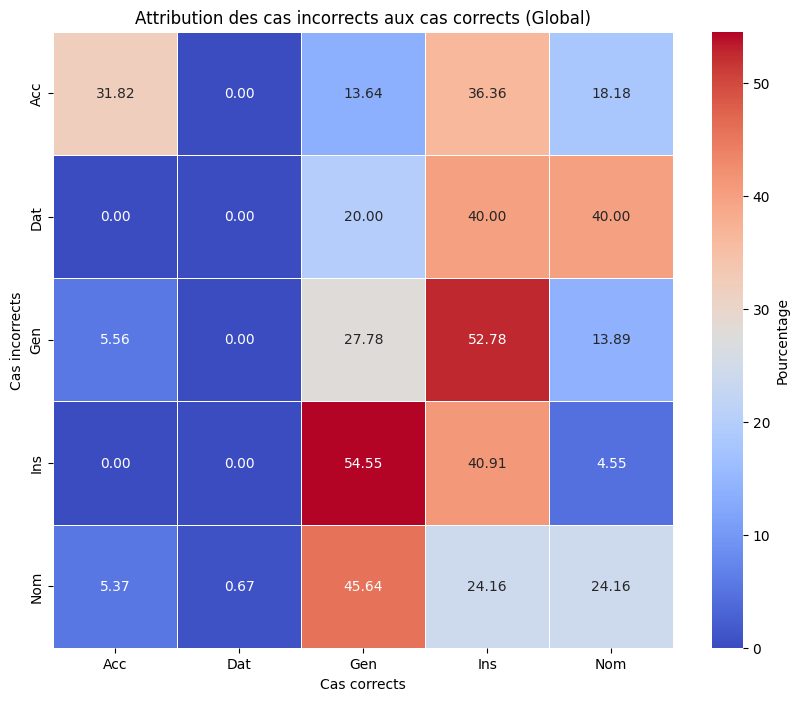

In [6]:
# === HEATMAP GLOBALE (POURCENTAGES) ===
statistiques = erreurs_df.groupby(['cas', 'cas correct']).size().unstack(fill_value=0)
statistiques_percent = statistiques.div(statistiques.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(statistiques_percent, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Pourcentage'}, linewidths=0.5)
plt.title('Attribution des cas incorrects aux cas corrects (Global)')
plt.xlabel('Cas corrects')
plt.ylabel('Cas incorrects')
plt.savefig('images/heatmap_déclinaison_global_spacy.png', dpi=300)
plt.show()

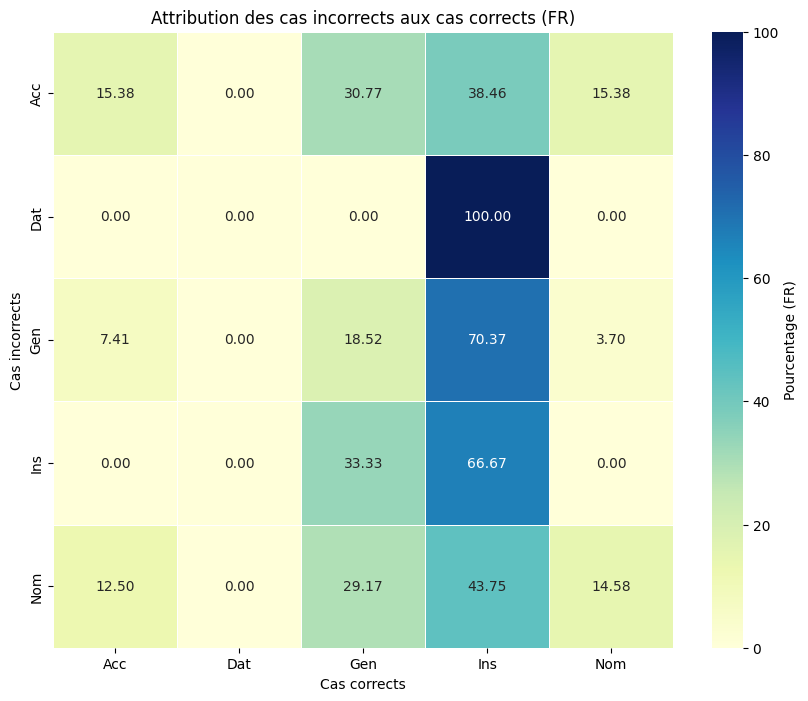

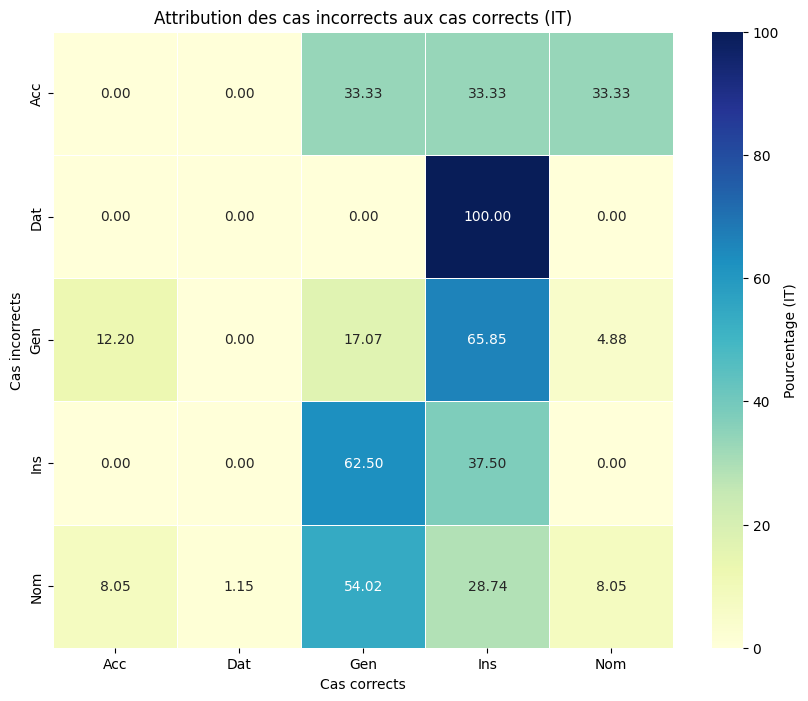

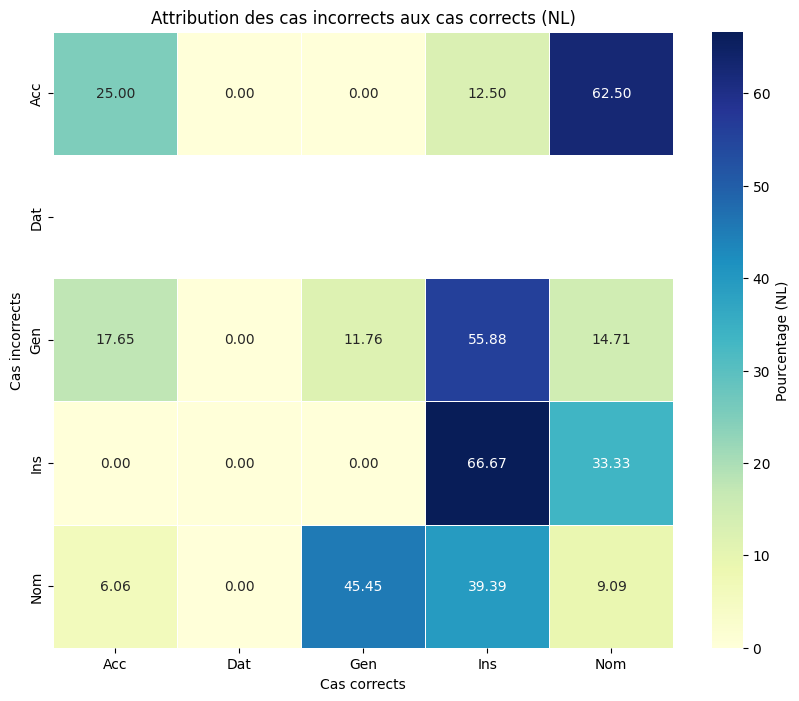

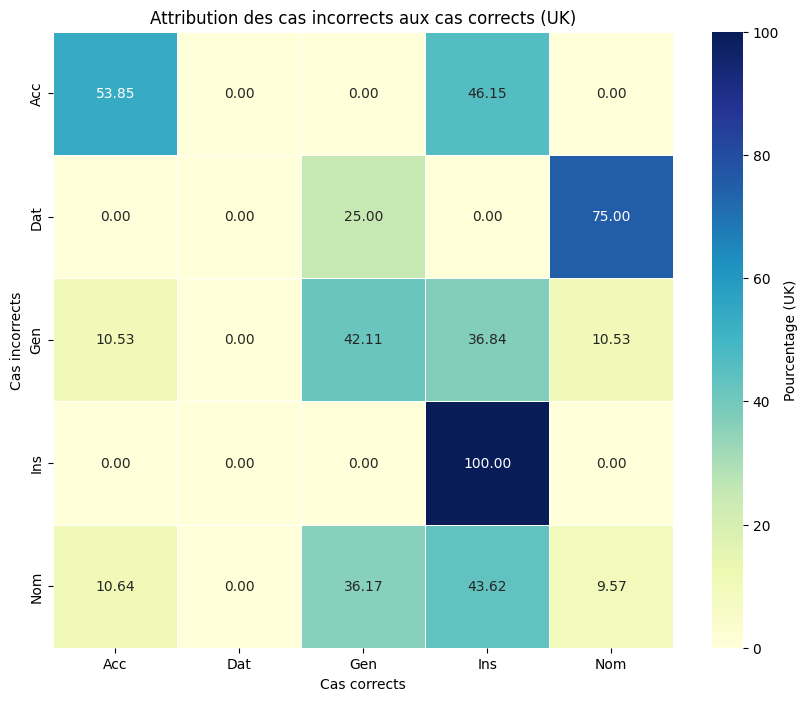

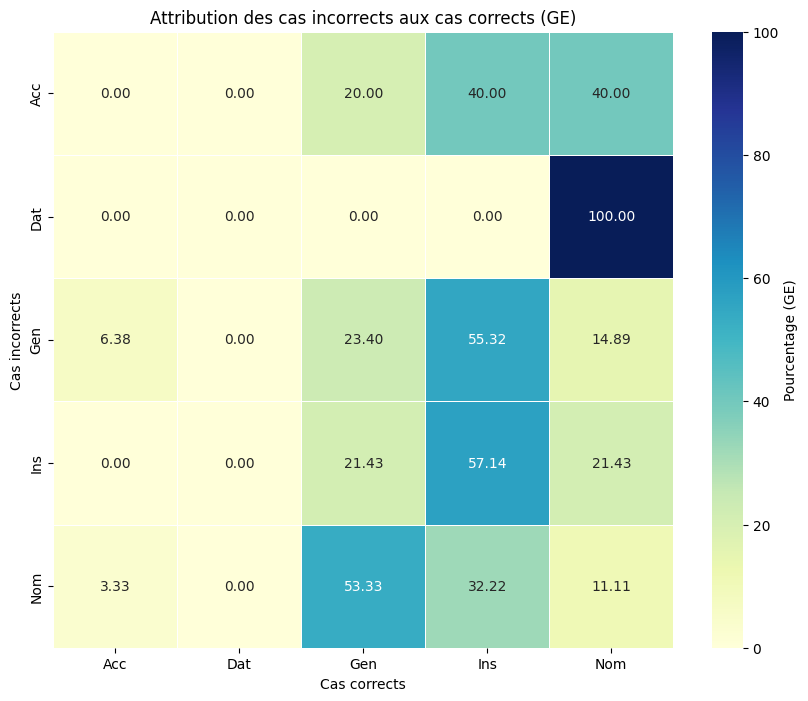

In [7]:
# === HEATMAP PAR PAYS ===
#for pays in ['FR', 'IT', 'NL', 'UK', 'GE']:
#    # Groupement pondéré par fréquence pour chaque pays
#    stat_pays = erreurs_df.groupby(['cas', 'cas correct'])[pays].sum().unstack(fill_value=0)
#    stat_pays_percent = stat_pays.div(stat_pays.sum(axis=1), axis=0) * 100

#    plt.figure(figsize=(10, 8))
#    sns.heatmap(stat_pays_percent, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': f'Pourcentage ({pays})'}, linewidths=0.5)
#    plt.title(f'Attribution des cas incorrects aux cas corrects ({pays})')
#    plt.xlabel('Cas corrects')
#    plt.ylabel('Cas incorrects')
#    plt.savefig(f'images/heatmap_déclinaison_spacy_{pays}.png', dpi=300)
#    plt.show()

In [8]:
# === CORRECT LOGIC: Part des erreurs par pays pour chaque combinaison (cas incorrect → cas correct) ===

# Regrouper les erreurs par combinaison (cas, cas correct) et sommer les erreurs par pays
#grouped = erreurs_df.groupby(['cas', 'cas correct'])[['FR', 'IT', 'NL', 'UK', 'GE']].sum()

# Créer la liste des lignes du fichier de sortie
#rows = []

#for (cas_incorrect, cas_correct), valeurs in grouped.iterrows():
#    total_erreurs = valeurs.sum()  # Total des erreurs pour cette combinaison
#    row = {
#        "Cas de forme incorrecte": cas_incorrect,
#        "Cas de forme correcte": cas_correct
#    }
#    for pays in ['FR', 'IT', 'NL', 'UK', 'GE']:
#        valeur = valeurs[pays]
#        pourcentage = (valeur / total_erreurs * 100) if total_erreurs > 0 else 0
#        row[pays] = f"{pourcentage:.0f}%"
#    rows.append(row)

# Convertir en DataFrame
#df_part_pays = pd.DataFrame(rows)

# Sauvegarder le fichier
#df_part_pays.to_csv("cas_correct_incorrect.csv", index=False)